In [1]:
import funcx

print(funcx.__version__, funcx.__path__)

fxc = funcx.FuncXClient()

0.0.1a2 ['/home/yadu/src/funcx/funcx']


In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import random

def draw_dag(dag2):   
    nx.nx_agraph.write_dot(dag2,'/tmp/test.dot')
    # same layout using matplotlib with no labels
    plt.title('draw_networkx')
    pos=graphviz_layout(dag2, prog='dot')
    nx.draw(dag2, pos, with_labels=True, arrows=False)
    plt.savefig('nx_test.png')

In [3]:
dag = nx.DiGraph()

In [4]:
n = 10
#[dag.add_node(f'f({i})') for i in range(n)]

In [5]:
#[dag.add_node(f'g({i})') for i in range(n)]

In [6]:
dag.add_edges_from([(f'f({i})', f'g({i})') for i in range(n)])

/home/yadu/miniconda3/envs/funcx_py3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


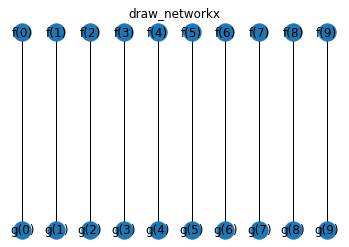

In [7]:
draw_dag(dag)

In [8]:
nx.is_weakly_connected(dag)

False

In [9]:
for i in nx.weakly_connected_components(dag):
    print(i)

{'f(0)', 'g(0)'}
{'f(1)', 'g(1)'}
{'f(2)', 'g(2)'}
{'f(3)', 'g(3)'}
{'f(4)', 'g(4)'}
{'g(5)', 'f(5)'}
{'f(6)', 'g(6)'}
{'f(7)', 'g(7)'}
{'g(8)', 'f(8)'}
{'g(9)', 'f(9)'}


In [10]:
# Creating dag of pattern reduce(R, map(g, map(f, ITER)))
# 
dag2 = nx.DiGraph()
dag2.add_edges_from([(f'f({i})', f'g({i})') for i in range(n)])
dag2.add_edges_from([(f'g({i})', f'R()') for i in range(n)])

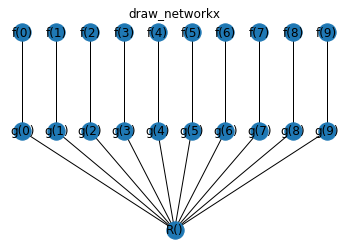

In [11]:
# nx.drawing.nx_pylab.draw_networkx(dag2)
draw_dag(dag2)

In [12]:
nx.is_weakly_connected(dag2)

True

In [13]:
for i in nx.weakly_connected_components(dag):
    print(i)

{'f(0)', 'g(0)'}
{'f(1)', 'g(1)'}
{'f(2)', 'g(2)'}
{'f(3)', 'g(3)'}
{'f(4)', 'g(4)'}
{'g(5)', 'f(5)'}
{'f(6)', 'g(6)'}
{'f(7)', 'g(7)'}
{'g(8)', 'f(8)'}
{'g(9)', 'f(9)'}


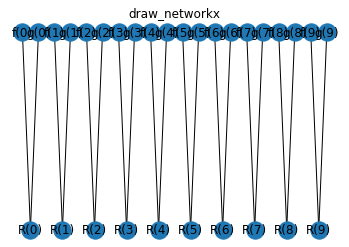

In [71]:
# Creating dag of pattern reduce(R, map(g, map(f, ITER)))
# 
dag2 = nx.DiGraph()
dag2.add_edges_from([(f'f({i})', f'R({i})') for i in range(n)])
dag2.add_edges_from([(f'g({i})', f'R({i})') for i in range(n)])
# nx.drawing.nx_pylab.draw_networkx(dag2)
draw_dag(dag2)

In [73]:
nx.is_weakly_connected(dag2)

False

In [74]:
list(nx.lexicographical_topological_sort(dag2))

['f(0)',
 'f(1)',
 'f(2)',
 'f(3)',
 'f(4)',
 'f(5)',
 'f(6)',
 'f(7)',
 'f(8)',
 'f(9)',
 'g(0)',
 'R(0)',
 'g(1)',
 'R(1)',
 'g(2)',
 'R(2)',
 'g(3)',
 'R(3)',
 'g(4)',
 'R(4)',
 'g(5)',
 'R(5)',
 'g(6)',
 'R(6)',
 'g(7)',
 'R(7)',
 'g(8)',
 'R(8)',
 'g(9)',
 'R(9)']

In [16]:
print(list(nx.topological_sort(dag2)))

['g(9)', 'g(8)', 'g(7)', 'g(6)', 'g(5)', 'g(4)', 'g(3)', 'g(2)', 'g(1)', 'g(0)', 'f(9)', 'R(9)', 'f(8)', 'R(8)', 'f(7)', 'R(7)', 'f(6)', 'R(6)', 'f(5)', 'R(5)', 'f(4)', 'R(4)', 'f(3)', 'R(3)', 'f(2)', 'R(2)', 'f(1)', 'R(1)', 'f(0)', 'R(0)']


In [17]:
nx.degree_assortativity_coefficient(dag2)

/home/yadu/miniconda3/envs/funcx_py3.6/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


nan

In [18]:
for i in nx.weakly_connected_components(dag2):
    subg = dag2.subgraph(i)
    print(nx.is_weakly_connected(subg))    
    print(list(nx.topological_sort(subg)))

True
['g(0)', 'f(0)', 'R(0)']
True
['g(1)', 'f(1)', 'R(1)']
True
['g(2)', 'f(2)', 'R(2)']
True
['g(3)', 'f(3)', 'R(3)']
True
['g(4)', 'f(4)', 'R(4)']
True
['f(5)', 'g(5)', 'R(5)']
True
['g(6)', 'f(6)', 'R(6)']
True
['g(7)', 'f(7)', 'R(7)']
True
['f(8)', 'g(8)', 'R(8)']
True
['f(9)', 'g(9)', 'R(9)']


In [19]:
for i in nx.weakly_connected_components(dag):
    print(i)

{'f(0)', 'g(0)'}
{'f(1)', 'g(1)'}
{'f(2)', 'g(2)'}
{'f(3)', 'g(3)'}
{'f(4)', 'g(4)'}
{'g(5)', 'f(5)'}
{'f(6)', 'g(6)'}
{'f(7)', 'g(7)'}
{'g(8)', 'f(8)'}
{'g(9)', 'f(9)'}


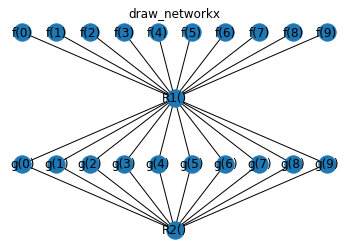

In [90]:
# Creating dag of pattern reduce(R, map(g, map(f, ITER)))
# 
dag2 = nx.DiGraph()
dag2.add_edges_from([(f'f({i})', f'R1()') for i in range(n)])
dag2.add_edges_from([(f'R1()', f'g({i})') for i in range(n)])
dag2.add_edges_from([(f'g({i})', f'R2()') for i in range(n)])
# nx.drawing.nx_pylab.draw_spring(dag2)
draw_dag(dag2)

In [95]:
def draw_parted_dag(dag2, mapping):   
    nx.nx_agraph.write_dot(dag2,'/tmp/test.dot')
    # same layout using matplotlib with no labels
    plt.title('draw_networkx')
    pos=graphviz_layout(dag2, prog='dot')
    color_map = [mapping[node] for node in dag2.nodes()]
    nx.draw(dag2, pos, node_color=color_map, with_labels=True, arrows=False)
    plt.savefig('nx_test.png')

/home/yadu/miniconda3/envs/funcx_py3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


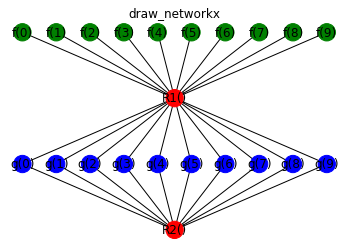

In [98]:
mapping = {}
for node in dag2.nodes():
    if node.startswith('f'):
        mapping[node] = 'green'
    elif node.startswith('g'):
        mapping[node] = 'blue'
    else:
        mapping[node] = 'red'
draw_parted_dag(dag2, mapping)

In [21]:
#sorted(lambda t: t, list(dag2.degree()))
largest = sorted(dag2.degree(), key=lambda t: t[1])[-1]
# dag2.remove_node(largest[0])

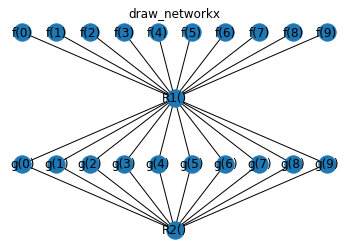

In [22]:
draw_dag(dag2)

In [23]:
nx.is_weakly_connected(dag2)

True

In [24]:
print(list(nx.topological_sort(dag2)))

['f(9)', 'f(8)', 'f(7)', 'f(6)', 'f(5)', 'f(4)', 'f(3)', 'f(2)', 'f(1)', 'f(0)', 'R1()', 'g(9)', 'g(8)', 'g(7)', 'g(6)', 'g(5)', 'g(4)', 'g(3)', 'g(2)', 'g(1)', 'g(0)', 'R2()']


In [25]:
for i in nx.weakly_connected_components(dag2):
    print(i)

{'f(0)', 'g(0)', 'g(4)', 'g(3)', 'f(7)', 'f(6)', 'g(9)', 'f(8)', 'g(5)', 'g(7)', 'g(2)', 'R2()', 'f(2)', 'g(1)', 'R1()', 'f(1)', 'f(5)', 'f(3)', 'g(8)', 'f(9)', 'g(6)', 'f(4)'}


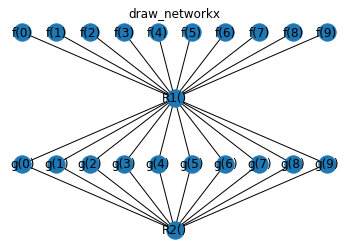

In [67]:
#nx.k_components(dag2)
draw_dag(dag2)

In [69]:
list(nx.lexicographical_topological_sort(dag2))

['f(0)',
 'f(1)',
 'f(2)',
 'f(3)',
 'f(4)',
 'f(5)',
 'f(6)',
 'f(7)',
 'f(8)',
 'f(9)',
 'R1()',
 'g(0)',
 'g(1)',
 'g(2)',
 'g(3)',
 'g(4)',
 'g(5)',
 'g(6)',
 'g(7)',
 'g(8)',
 'g(9)',
 'R2()']

In [28]:
# Attempt at simplifying things a bit.
# Lets assume every graph is composed of map, reduce  

In [42]:
d = nx.bfs_tree(dag2, 'f(0)')
print(list(nx.dfs_postorder_nodes(dag2, 'f(0)')))
# draw_dag(d)

['R2()', 'g(0)', 'g(1)', 'g(2)', 'g(3)', 'g(4)', 'g(5)', 'g(6)', 'g(7)', 'g(8)', 'g(9)', 'R1()', 'f(0)']


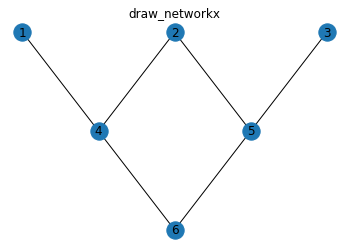

In [102]:
dag3 = nx.DiGraph()
edges = [(1,4), (2,4), (2,5), (3,5), (4,6), (5,6)]
for e in edges:
    dag3.add_edge(*e)    
# nx.drawing.nx_pylab.draw_spring(dag2)
draw_dag(dag3)

In [46]:
knap_sack = 3

In [66]:
#list(nx.topological_sort(dag3))
list(nx.lexicographical_topological_sort(dag3))

[1, 2, 3, 4, 5, 6]

In [85]:
def process_dag(dag, edge_weight=1, vertex_weight=1):
    edge_total = sum([edge_weight for e in dag.edges()])
    vertex_total = sum([edge_weight for e in dag.nodes()])
    return edge_total + vertex_total

process_dag(dag3)

12

In [83]:
dag.nodes()

NodeView(('f(0)', 'g(0)', 'f(1)', 'g(1)', 'f(2)', 'g(2)', 'f(3)', 'g(3)', 'f(4)', 'g(4)', 'f(5)', 'g(5)', 'f(6)', 'g(6)', 'f(7)', 'g(7)', 'f(8)', 'g(8)', 'f(9)', 'g(9)'))

In [163]:
mapping = {}

def check_children(dag, parent, cur_batch, depth, batch_size):    
    if depth <= 0 :
        print("Depth limit reached")
        return []
    
    x = dag[parent].keys()
    if len(x) > batch_size:
        print("Too many children")
        return []
        
    print("Checking children:", x)
    for child in x:
        if not set(dag.predecessors(child)) <= cur_batch:
            print("Parents not in selected list")
            return []
    return x    
        
        
def part_method(dag, batch_size=4, depth_limit=2):
    # All nodes in dag are ready to be partitioned
    selected = []
    d = dag.copy()
    print(dag.in_degree())
    for node, in_d in dag.in_degree():
        if in_d == 0:
            selected.append(node)
            print("Selected node :", node)
            d.remove_node(node)
            print(selected)
            selected.extend(check_children(dag, node, set(selected), 
                                           depth=depth_limit-1, 
                                           batch_size=batch_size - len(selected)))
    return selected, d

In [155]:
subg, g = part_method(dag3)

[(1, 0), (4, 2), (2, 0), (5, 2), (3, 0), (6, 2)]
Selected node : 1
[1]
Checking children: KeysView(AtlasView({4: {}}))
Parents not in selected list
Selected node : 2
[1, 2]
Checking children: KeysView(AtlasView({4: {}, 5: {}}))
Parents not in selected list
Selected node : 3
[1, 2, 3]
Checking children: KeysView(AtlasView({5: {}}))


In [164]:
color_mapping = {}
for n in dag3:
    print(n)
    if n in subg:        
        color_mapping[n] = 'green'
    else:
        color_mapping[n] = 'red'
print(subg)

1
4
2
5
3
6
[1, 2, 3, 5]


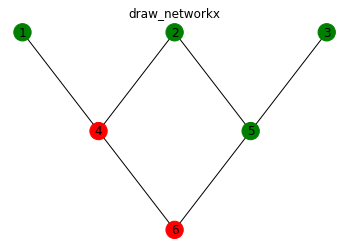

In [160]:
draw_parted_dag(dag3, color_mapping)

In [118]:
dag3[2]

AtlasView({4: {}, 5: {}})

In [135]:
print(list(dag3.predecessors(4)))

[1, 2]


In [136]:
dag3[1]

AtlasView({4: {}})